# Imported Libraries
=======================
## Data Handling and Analysis
### Numerical Computations
* `numpy` (as `np`): For numerical computations and linear algebra operations.
### Data Manipulation
* `pandas` (as `pd`): For data manipulation, processing, and I/O operations (e.g., reading CSV files).
### Visualizations
* `matplotlib.pyplot` (as `plt`): For creating visualizations and plots.
* `seaborn` (as `sns`): For creating informative and attractive statistical graphics.

## Machine Learning and Modeling
### Scikit-learn Algorithms
* `LogisticRegression`: For logistic regression modeling.
* `SVC`: For support vector machine modeling.
* `KNeighborsClassifier`: For k-nearest neighbors modeling.
* `DecisionTreeClassifier`: For decision tree modeling.
* `RandomForestClassifier`: For random forest modeling.


## Model Evaluation and Metrics
### Classification Metrics
* `accuracy_score`: For calculating model accuracy.
* `classification_report`: For generating classification reports.
* `confusion_matrix`: For creating confusion matrices.
### Scoring Metrics
* `precision_score`: For calculating model precision.
* `recall_score`: For calculating model recall.
* `f1_score`: For calculating model F1 score.
* `roc_auc_score`: For calculating model ROC-AUC score.
### Model Selection and Splitting
* `train_test_split` (from `sklearn.model_selection`): For splitting data into training and testing sets.

## Miscellaneous
### Utilities
* `collections`: For using the `Counter` class.
* `warnings`: For ignoring warnings.

In [1]:
# Imported Libraries

import numpy as np
import pandas as pd4
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
# Classifier Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Other Libraries
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

# Importing Data
===============
## Loading the Dataset
The dataset is loaded from a CSV file named `creditcard.csv` using `pandas`.


In [2]:
# Loading the dataset
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Description
===============
## Statistical Summary
A statistical summary of the dataset is generated using the `describe()` method.

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Preprocessing
================

## Handling Missing Values and Duplicate Rows

The dataset is checked for missing values and duplicate rows, and then cleaned accordingly.

### Step 1: Check Maximum Missing Values

Determine the maximum number of missing values in any single column.

### Step 2: Identify Duplicate Rows

Count the number of duplicate rows in the dataset.

### Step 3: Remove Duplicate Rows

Delete duplicate rows to ensure data uniqueness.

### Step 4: Display Column Names

List the column names in the preprocessed dataset.

In [4]:
df.isnull().sum().max()

0

In [5]:
print("duplicate values :", df.duplicated().sum())

duplicate values : 1081


In [6]:
df=df.drop_duplicates()

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Class Distribution Analysis
==========================

## Class Distribution Statistics

The distribution of the target variable 'Class' is analyzed.

### Step 1: Print Class Distribution Statistics

Print the number and percentage of observations in each class.

### Step 2: Visualize Class Distribution

Visualize the class distribution using a pie chart.

### Class Distribution Pie Chart

A pie chart showing the distribution of the target variable 'Class'.

*   **Fraud**: The number of fraudulent transactions.
*   **Not Fraud**: The number of non-fraudulent transactions.

The chart provides a clear visualization of the class imbalance in the dataset.

In [8]:
print("No Fraud is :", df['Class'].value_counts()[0], "and", round(df['Class'].value_counts()[0]/len(df)*100,2),"% of the dataset",)
print("Fraud is :", df['Class'].value_counts()[1] ,"and", round(df['Class'].value_counts()[1]/len(df)*100,2),"% of the dataset")

No Fraud is : 283253 and 99.83 % of the dataset
Fraud is : 473 and 0.17 % of the dataset


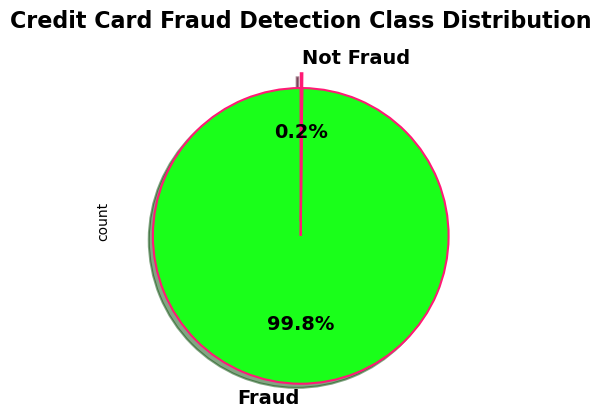

In [9]:
df['Class'].value_counts().plot(
    kind='pie',
    shadow=True,                      
    startangle=90,                   
    colors=['#1aff1a', '#ff1a75'],    
    explode=(0.1, 0),                 
    autopct='%1.1f%%',                
    labels=['Fraud', 'Not Fraud'],    
    wedgeprops={'edgecolor': '#ff1a75', 'linewidth': 1.5},  
    textprops={'fontsize': 14, 'color': 'black', 'fontweight': 'bold'},  
)

plt.title('Credit Card Fraud Detection Class Distribution', fontsize=16, fontweight='bold', color='black')

plt.gca().set_aspect('equal')
plt.show()


# Data Visualization and Preprocessing
=====================================

## Transaction Amount and Time Distribution

Visualize the distribution of transaction amount and time using histograms.

### Step 1: Visualize Distributions

Create histograms for transaction amount and time.

### Transaction Amount and Time Histograms

Two histograms showing the distribution of transaction amount and time.

*   **Transaction Amount**: The distribution of transaction amounts.
*   **Transaction Time**: The distribution of transaction times.

## Scaling Remaining Columns

Scale the remaining columns ('Amount' and 'Time') using RobustScaler.

### Step 1: Scale Columns

Scale the 'Amount' and 'Time' columns.

## Reordering Columns

Reorder the columns to bring the scaled columns to the front.

### Step 1: Reorder Columns

Move the scaled columns to the beginning of the dataframe.

## Splitting the Dataset

Split the dataset into training and testing sets.

### Step 1: Split Dataset

Split the dataset into features (x) and target (y).

### Class Distribution

Print the class distribution of the dataset.

*   **No Frauds**: The percentage of non-fraudulent transactions.
*   **Frauds**: The percentage of fraudulent transactions.

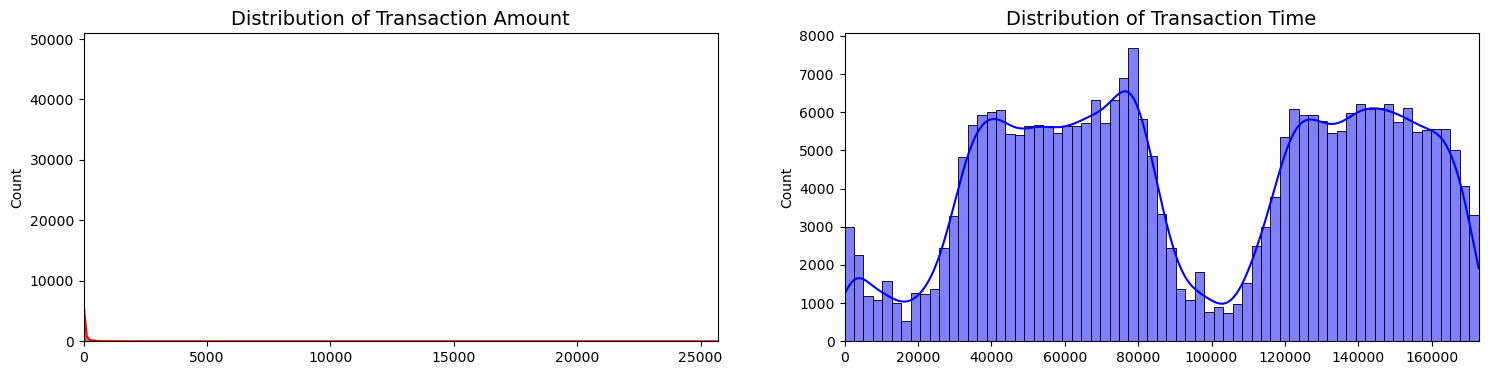

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [11]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler , MaxAbsScaler

df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount']=RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount','Time'], axis=1, inplace=True)

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.995290,1.774718
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.995290,-0.268530
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.995279,4.959811
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.995279,1.411487
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.995267,0.667362


In [13]:
#chaning the position of last two columns and bring them in start.
scaled_amount = df['scaled_amount'] # assigning the scaled_amount to scaled_amount for independent variable
scaled_time = df['scaled_time'] #assigning the scaled_time to scaled_time for independent variable
df.drop(['scaled_time', 'scaled_amount'], axis=1, inplace=True)
df.insert(0, 'scaled_time', scaled_time)
df.insert(1,'scaled_amount', scaled_amount)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.995290,1.774718,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.995290,-0.268530,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.995279,4.959811,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.995279,1.411487,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.995267,0.667362,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [14]:
#Splitting the dataset and training the dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

x=df.drop('Class',axis=1)
y=df['Class']

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


# Balancing the Dataset
=====================

## Random Under-Sampling
### Definition

Random under-sampling is a technique used to balance class distributions by randomly selecting a subset of the majority class instances.

### Why Balance Classes?

Class imbalance can lead to biased models that favor the majority class. Balancing classes ensures that the model learns from both classes equally.

### Implementation

#### Step 1: Determining Class Imbalance

* Determine the class imbalance by using `value_counts()` on the class column to determine the amount for each label.

#### Step 2: Balancing Classes

* Once the imbalance is determined, bring the non-fraud transactions to the same amount as fraud transactions (assuming a 50/50 ratio).
* This will result in 473 cases of fraud and 473 cases of non-fraud transactions.

#### Step 3: Shuffling the Data

* After balancing the classes, shuffle the data to test the model's accuracy and ensure it can maintain a certain level of performance every time the script is run.

#### Step 4: Create a Balanced Dataset

Combine the selected transactions and randomize the dataset to create a balanced dataset.

In [15]:
df=df.sample(frac=1)
fraud_df=df.loc[df['Class'] == 1]
non_fraud_df=df.loc[df['Class'] == 0][:473]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df=normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
42741,-0.510798,6.078014,-9.001351,6.613284,-12.423635,7.519929,-10.266255,-2.113208,-9.984287,5.541941,...,-0.645394,1.775891,-1.224758,0.082594,0.452089,0.463827,-0.296928,0.526506,-0.450890,1
261473,0.885399,-0.237797,-2.349340,1.512604,-2.647497,1.753792,0.406328,-2.188494,-0.686935,-0.547984,...,-0.093421,-0.088519,-0.595178,0.258148,0.061901,-0.354180,-1.152671,-0.736073,0.733703,1
159880,0.332876,-0.292032,2.118844,-0.188818,-1.773975,0.035555,0.393783,-0.495229,0.010088,-0.119695,...,-0.330158,0.204364,0.656573,-0.041176,-0.002308,0.364925,-0.400787,-0.006269,-0.058328,0
150662,0.107652,4.089278,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,...,0.055684,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,1
74507,-0.341678,1.507996,-7.427924,2.948209,-8.678550,5.185303,-4.761090,-0.957095,-7.773380,0.717309,...,-0.123085,-0.299847,0.610479,0.789023,-0.564512,0.201196,-0.111225,1.144599,0.102280,1


Distribution of the Classes in the subsample dataset
Class
1    0.5
0    0.5
Name: count, dtype: float64


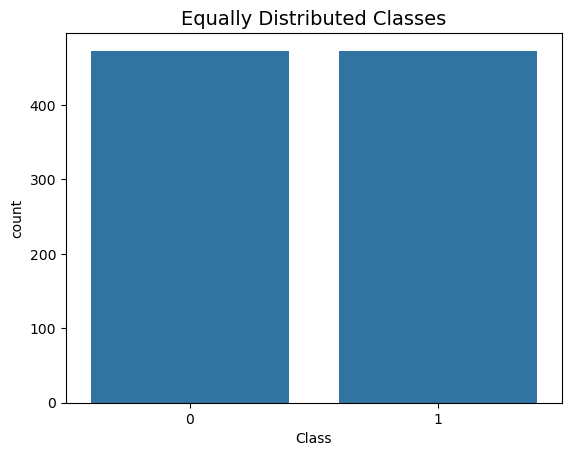

In [16]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# Data Visualization
=====================

## Correlation Analysis

### Overview

Correlation matrices identify feature relationships and their influence on fraud transactions.

### Key Findings

*   Negative correlations: V17, V14, V12, V10
*   Positive correlations: V2, V4, V11, V19

### Visualizations

#### Positive Correlations

*   V11, V4, V2, V19 vs Class

#### Distribution Plots

*   V14, V12, V10 in fraud transactions

### Best Practices

*   Use subsample dataframe to avoid class imbalance effects
*   Boxplots for feature distribution in fraudulent and non-fraudulent transactions

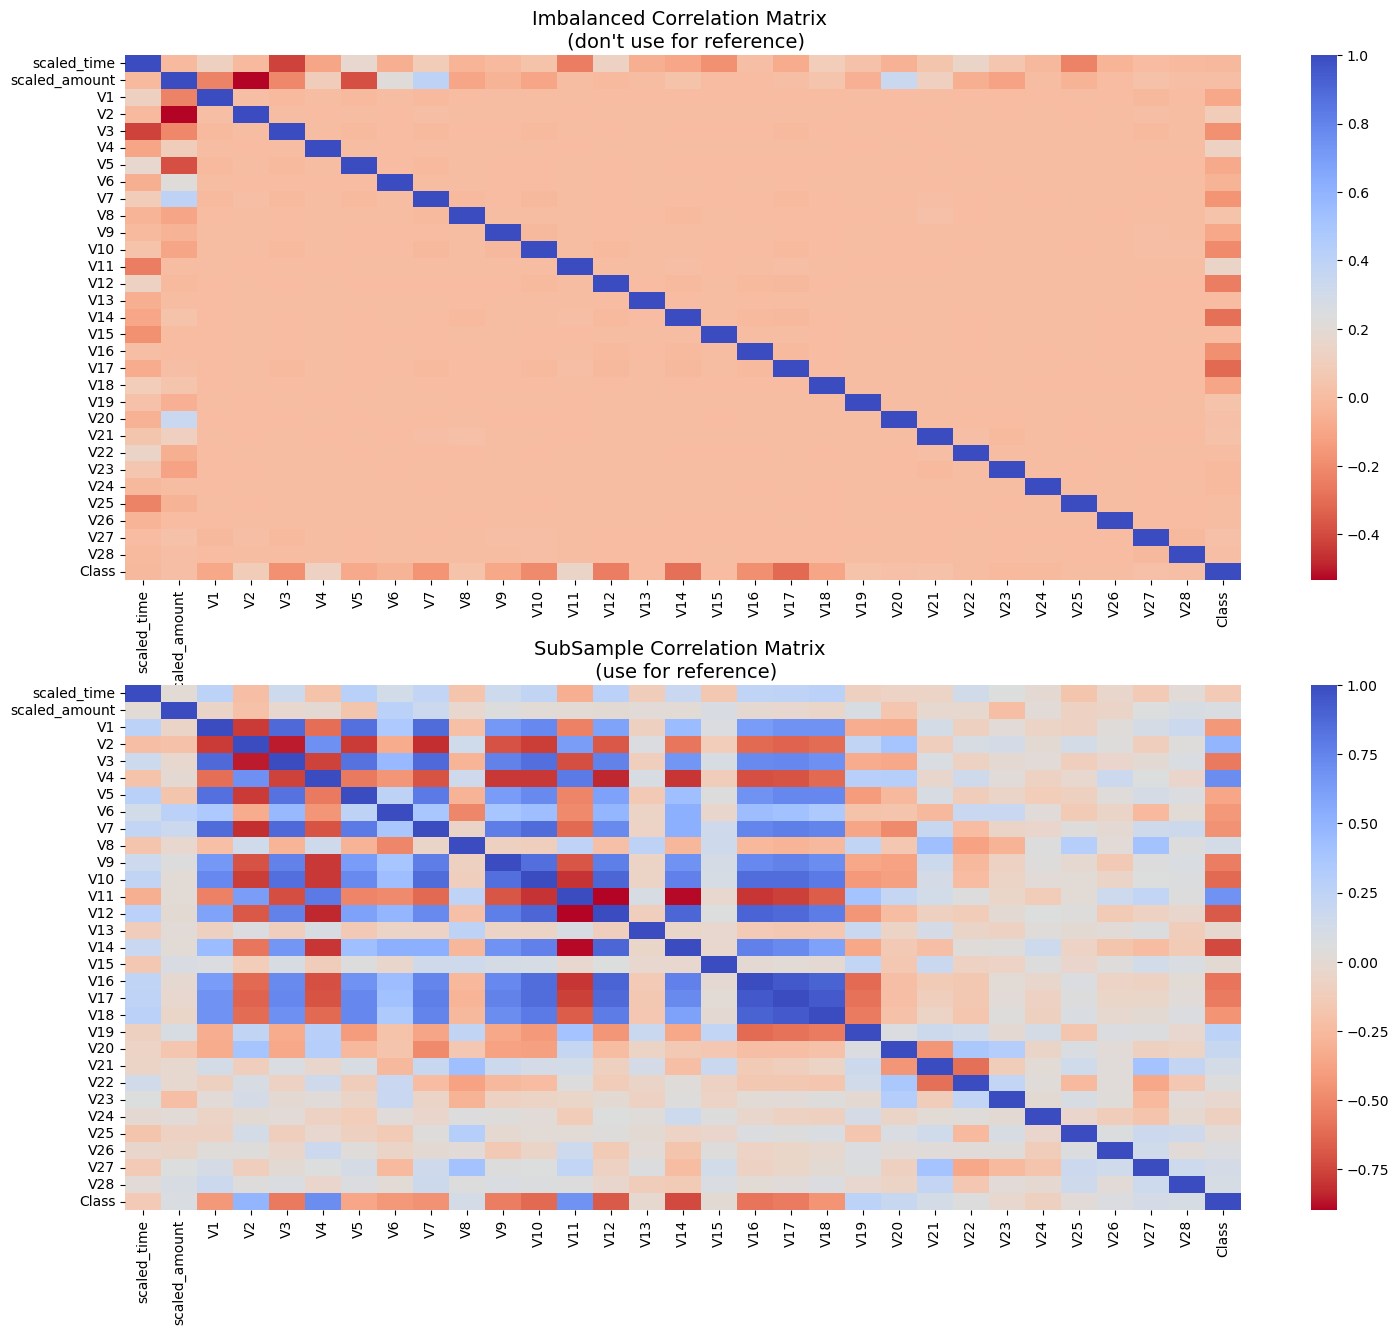

In [17]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,15))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm_r", annot_kws={'size':10}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':10}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

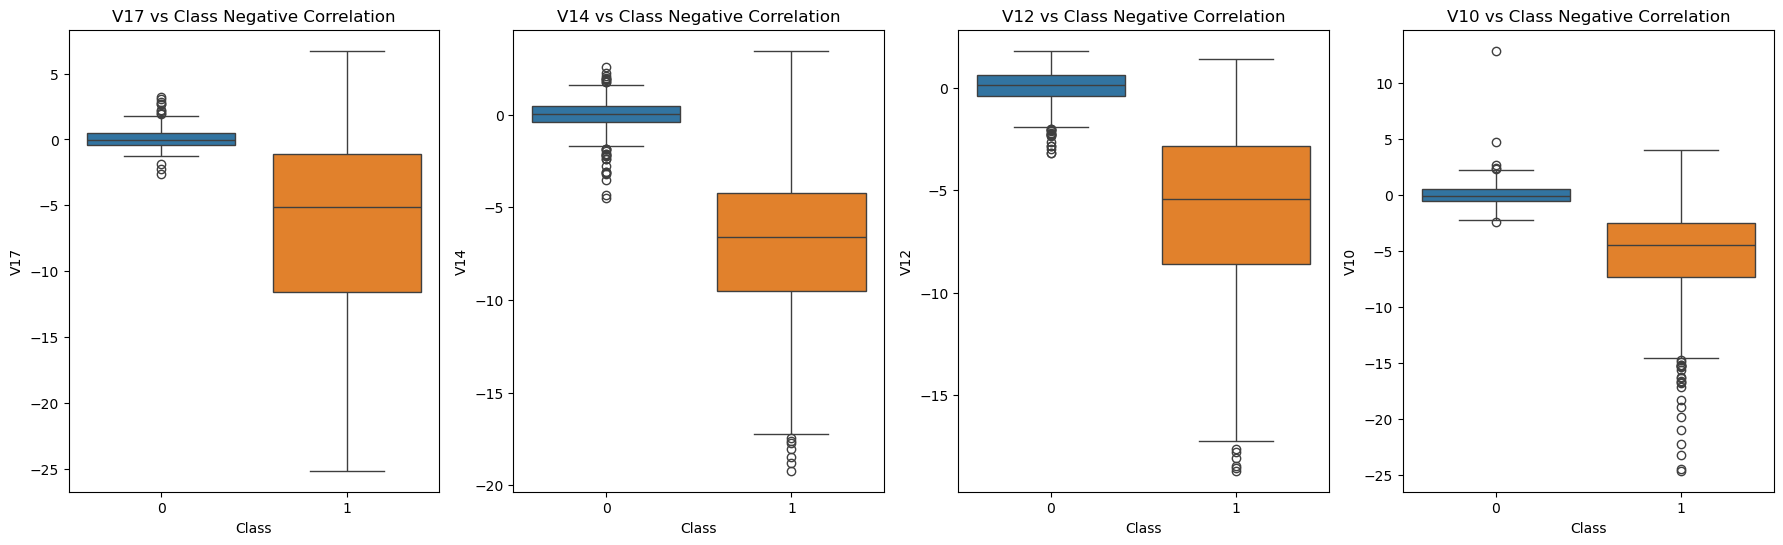

In [18]:
f, axes = plt.subplots(ncols=4, figsize=(22,6))

colors = sns.color_palette()  # Use seaborn's default color palette
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

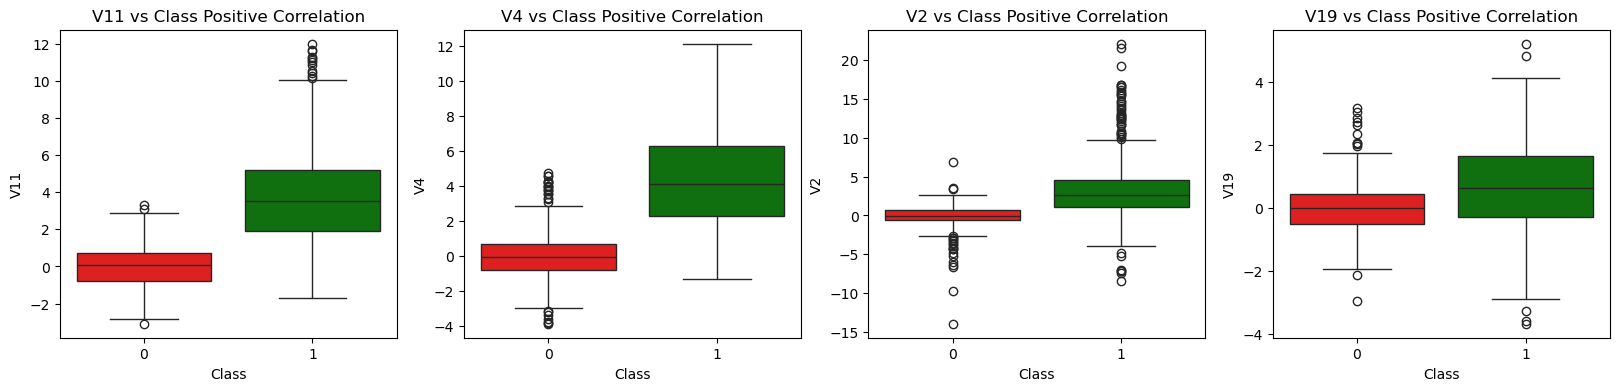

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
colors = ['Red', 'Green']
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

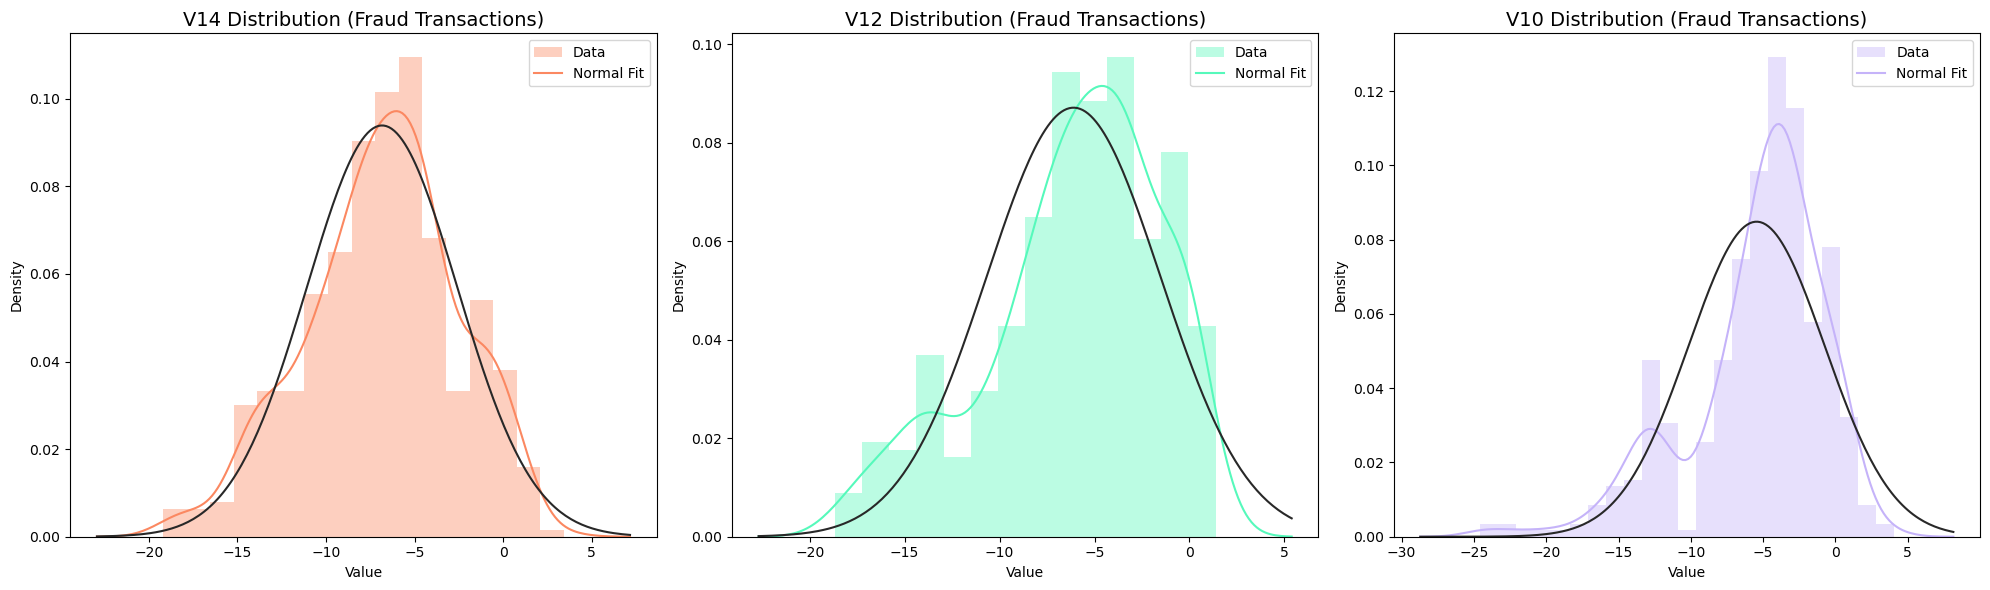

In [20]:
# Create a figure with three subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Extract values for each feature (V14, V12, V10) from the dataset (new_df) 
# where the Class column equals 1 (indicating fraud transactions)
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values

# Create distribution plots with fitted normal distribution curves
sns.distplot(v14_fraud_dist, ax=ax1, fit=norm, color='#FB8861', label='Data')
sns.distplot(v12_fraud_dist, ax=ax2, fit=norm, color='#56F9BB', label='Data')
sns.distplot(v10_fraud_dist, ax=ax3, fit=norm, color='#C5B3F9', label='Data')

# Set titles, labels, and legends
ax1.set_title('V14 Distribution (Fraud Transactions)', fontsize=14)
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.legend(['Data', 'Normal Fit'])

ax2.set_title('V12 Distribution (Fraud Transactions)', fontsize=14)
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.legend(['Data', 'Normal Fit'])

ax3.set_title('V10 Distribution (Fraud Transactions)', fontsize=14)
ax3.set_xlabel('Value')
ax3.set_ylabel('Density')
ax3.legend(['Data', 'Normal Fit'])

# Display the plots
plt.tight_layout()
plt.show()

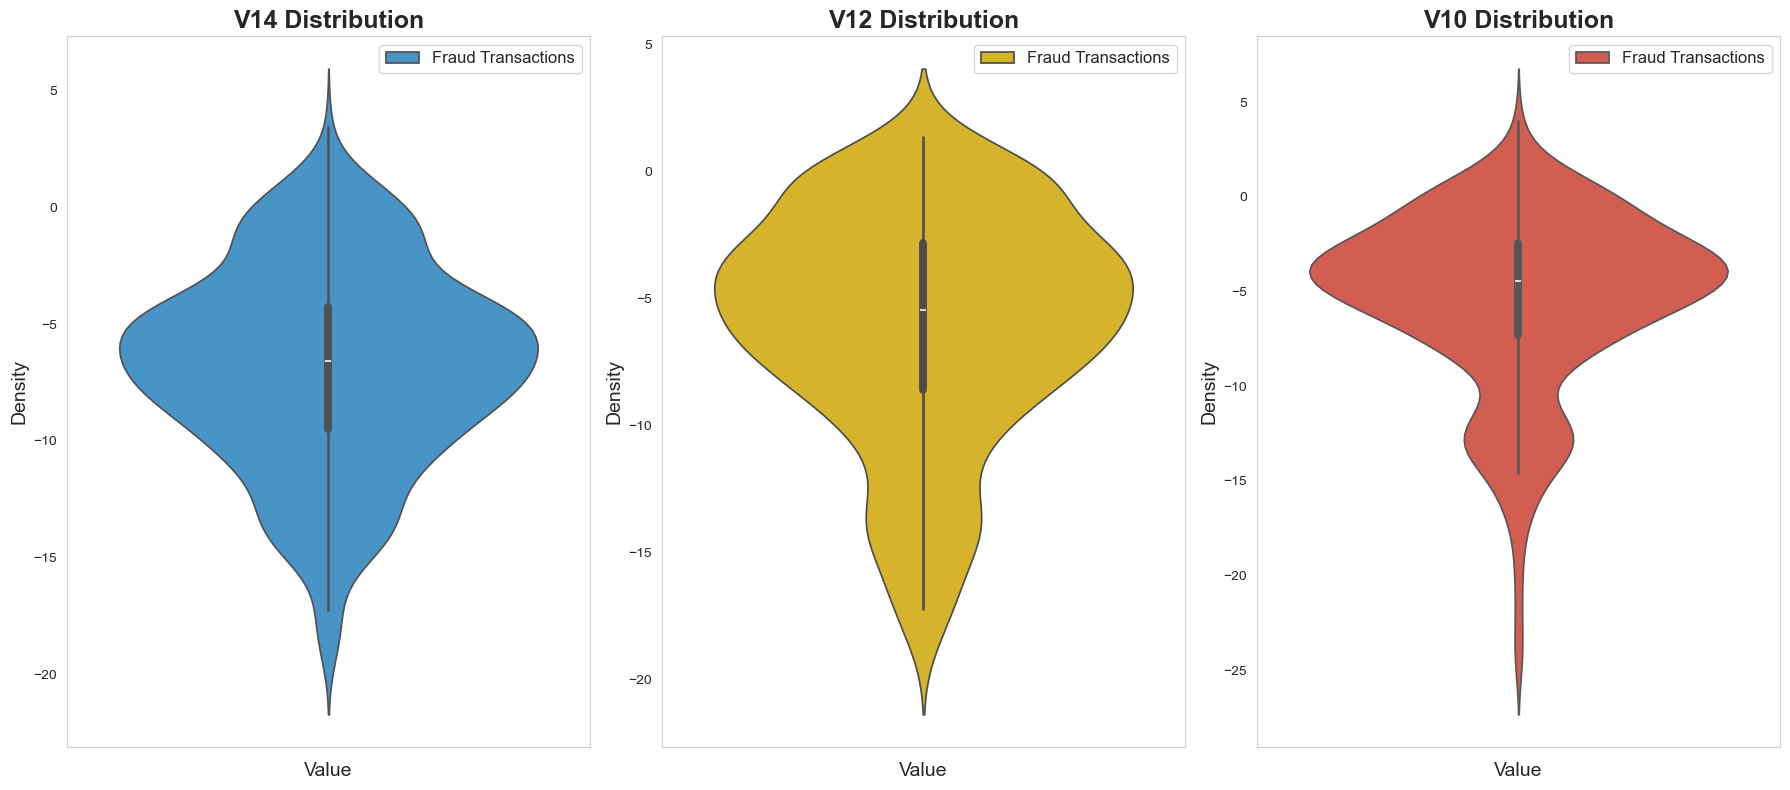

In [21]:
# Set plot style and color palette
sns.set_style("whitegrid")
sns.set_palette("muted")

# Create a figure with three subplots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))

# Extract values for each feature (V14, V12, V10) from the dataset (new_df) 
# where the Class column equals 1 (indicating fraud transactions)
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values

# Create Violin Plots
sns.violinplot(v14_fraud_dist, ax=ax1, color='#3498db', label='Fraud Transactions')
sns.violinplot(v12_fraud_dist, ax=ax2, color='#f1c40f', label='Fraud Transactions')
sns.violinplot(v10_fraud_dist, ax=ax3, color='#e74c3c', label='Fraud Transactions')

# Set titles, labels, and legends
ax1.set_title('V14 Distribution', fontsize=18, fontweight='bold')
ax1.set_xlabel('Value', fontsize=14)
ax1.set_ylabel('Density', fontsize=14)
ax1.legend(loc='upper right', fontsize=12)

ax2.set_title('V12 Distribution', fontsize=18, fontweight='bold')
ax2.set_xlabel('Value', fontsize=14)
ax2.set_ylabel('Density', fontsize=14)
ax2.legend(loc='upper right', fontsize=12)

ax3.set_title('V10 Distribution', fontsize=18, fontweight='bold')
ax3.set_xlabel('Value', fontsize=14)
ax3.set_ylabel('Density', fontsize=14)
ax3.legend(loc='upper right', fontsize=12)

# Customize plots
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

# Display the plots
plt.tight_layout()
plt.show()

# Outlier Removal and Visualization
================================

## Outlier Removal

*   Function: `remove_outliers` using IQR method
*   Features: V14, V12, V10

## Results

*   Number of instances after outlier removal: `len(new_df)`

## Visualization

*   Boxplots with outliers removed for V14, V12, V10
*   Observations: Fewer extreme outliers in each feature

In [22]:
# Function to remove outliers using IQR
def remove_outliers(df, feature, class_label=1):
    fraud_values = df[feature].loc[df['Class'] == class_label].values
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in fraud_values if x < lower or x > upper]
    print(f'Feature {feature} Outliers for Fraud Cases: {len(outliers)}')
    print(f'{feature} outliers: {outliers}')
    
    df = df.drop(df[(df[feature] > upper) | (df[feature] < lower)].index)
    return df

# Apply function to remove outliers for V14, V12, and V10 features
new_df = remove_outliers(new_df, 'V14')
new_df = remove_outliers(new_df, 'V12')
new_df = remove_outliers(new_df, 'V10')

print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Feature V14 Outliers for Fraud Cases: 7
V14 outliers: [-18.0499976898594, -18.4937733551053, -18.8220867423816, -17.7216383537133, -17.6206343516773, -17.4759212828566, -19.2143254902614]
Feature V12 Outliers for Fraud Cases: 7
V12 outliers: [-17.003289445516, -17.1504052507291, -18.4311310279993, -18.6837146333443, -17.1829184301947, -18.5536970096458, -18.0475965708216]
Feature V10 Outliers for Fraud Cases: 29
V10 outliers: [-24.4031849699728, -18.2711681738888, -16.7460441053944, -14.166794659606, -22.1870885620007, -16.6496281595399, -18.9132433348732, -20.9491915543611, -15.2318333653018, -14.5571590528859, -14.1101844415457, -16.3035376590131, -13.6081431627279, -14.6764702497464, -15.1237521803455, -14.2266980575287, -15.3460988468775, -15.5637913387301, -15.2399619587112, -13.6705451263516, -17.1415136412892, -15.1241628144947, -19.836148851696, -23.2282548357516, -14.9246547735487, -16.2556117491401, -14.5331616869738, -24.5882624372475, -16.6011969664137]
Number of Instances 

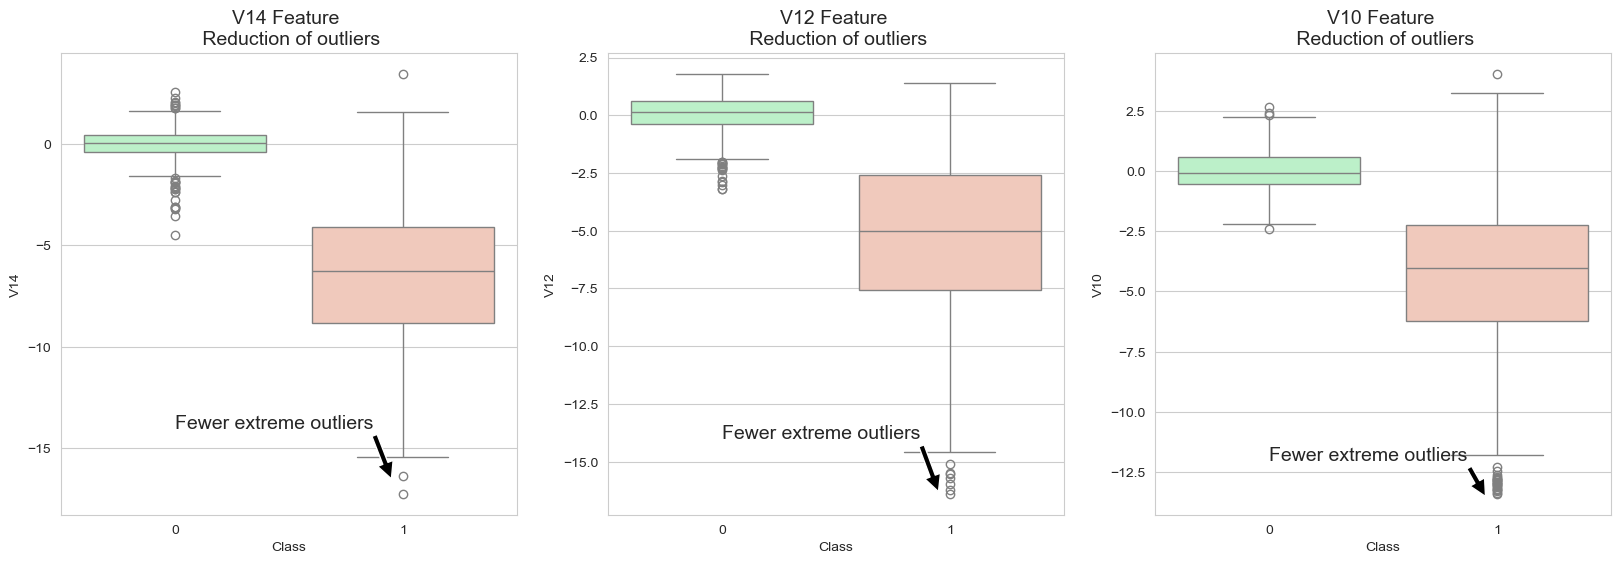

In [23]:

# Create a figure with three subplots
f, axs = plt.subplots(1, 3, figsize=(20, 6))

# Define colors and annotations
colors = ['#B3F9C5', '#f9c5b3']
annotations = [
    {'xy': (0.95, -16.5), 'xytext': (0, -14), 'text': 'Fewer extreme outliers'},
    {'xy': (0.95, -16.3), 'xytext': (0, -14), 'text': 'Fewer extreme outliers'},
    {'xy': (0.95, -13.5), 'xytext': (0, -12), 'text': 'Fewer extreme outliers'}
]

# Create boxplots with outliers removed
features = ['V14', 'V12', 'V10']
for ax, feature, annotation in zip(axs, features, annotations):
    sns.boxplot(x="Class", y=feature, data=new_df, ax=ax, palette=colors)
    ax.set_title(f"{feature} Feature \n Reduction of outliers", fontsize=14)
    ax.annotate(annotation['text'], xy=annotation['xy'], xytext=annotation['xytext'],
                arrowprops=dict(facecolor='black'), fontsize=14)

plt.show()

# Classifier Training, Evaluation, and Prediction
=============================================

## Data Preparation

*   Undersampling before cross-validation
*   Split data into training and test sets (80/20)
*   Scale features using StandardScaler

## Classifiers

*   LogisticRegression
*   KNeighborsClassifier
*   SVC
*   DecisionTreeClassifier

## Training and Evaluation

*   Train classifiers on training data
*   Evaluate using accuracy, precision, recall, F1-score, ROC-AUC, and cross-validation

## Results

*   Classifier performance metrics
*   Classification reports and confusion matrices

## Prediction

*   `predict_class` function:
	+ Takes input values
	+ Scales them using StandardScaler
	+ Predicts class using trained classifier
*   Get input values from user
*   Print predicted class


In [24]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [25]:
# Split data into features (X) and target (y)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Train and evaluate classifiers
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    
    # Print results
    print(f"Classifier: {key}")
    print(f"Training Score: {round(training_score.mean(), 2) * 100}%")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Classifier: LogisticRegression
Training Score: 94.0%
Accuracy: 0.93
Precision: 0.98
Recall: 0.89
F1-score: 0.93
ROC-AUC: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        90
           1       0.98      0.89      0.93        91

    accuracy                           0.93       181
   macro avg       0.94      0.93      0.93       181
weighted avg       0.94      0.93      0.93       181

Confusion Matrix:
[[88  2]
 [10 81]]


Classifier: KNearest
Training Score: 92.0%
Accuracy: 0.93
Precision: 1.00
Recall: 0.87
F1-score: 0.93
ROC-AUC: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        90
           1       1.00      0.87      0.93        91

    accuracy                           0.93       181
   macro avg       0.94      0.93      0.93       181
weighted avg       0.94      0.93      0.93       181

Confusion Matrix:
[

In [30]:
def predict_class(input_values):
    scaled_values = scaler.transform([input_values])
    predicted_class = classifier.predict(scaled_values)
    return predicted_class[0]

input_values = []
for feature in X.columns:
    while True:
        value = input(f"Enter {feature} value: ")
        if value:
            try:
                value = float(value)
                input_values.append(value)
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        else:
            print("Please enter a value.")

predicted_class = predict_class(input_values)
if predicted_class == 1:
    print("Fraud / Anomalous Transaction")
else:
    print("No Fraud / No Anomalies Detected")

Invalid input. Please enter a number.
Invalid input. Please enter a number.
Fraud / Anomalous Transaction
